In [1]:
import requests
from typing import List
from mplsoccer import Radar, grid


In [5]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'uk,ru-RU;q=0.9,ru;q=0.8,en-US;q=0.7,en;q=0.6',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"9f784e861d"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
}
headers['If-Modified-Since'] = 'Mon, 1 Jan 2024 00:00:00 GMT'


In [3]:
FEDERICO_VALVERDE_ID = 831808
JOAO_CANCELO_ID = 138892

In [6]:
valverde_response = requests.get(f'https://api.sofascore.com/api/v1/event/11369369/player/{FEDERICO_VALVERDE_ID}/statistics', headers=headers)
cancelo_response = requests.get(f'https://api.sofascore.com/api/v1/event/11369369/player/{JOAO_CANCELO_ID}/statistics', headers=headers)

valverde_stats = valverde_response.json()['statistics']
cancelo_stats = cancelo_response.json()['statistics']

In [20]:
print(cancelo_stats)

{'totalPass': 29, 'accuratePass': 20, 'totalLongBalls': 4, 'accurateLongBalls': 1, 'totalCross': 3, 'aerialLost': 1, 'duelLost': 7, 'duelWon': 3, 'challengeLost': 1, 'dispossessed': 2, 'totalContest': 3, 'wonContest': 1, 'blockedScoringAttempt': 1, 'totalClearance': 1, 'totalTackle': 1, 'wasFouled': 1, 'fouls': 1, 'totalOffside': 1, 'minutesPlayed': 76, 'touches': 46, 'rating': 6.3, 'possessionLostCtrl': 17, 'expectedGoals': 0.091, 'keyPass': 1, 'ratingVersions': {'original': 6.3, 'alternative': 6.2}, 'expectedAssists': 0.0380286}


In [17]:
print(valverde_stats)

{'totalPass': 51, 'accuratePass': 47, 'totalLongBalls': 3, 'accurateLongBalls': 2, 'duelLost': 1, 'duelWon': 3, 'totalContest': 2, 'wonContest': 1, 'blockedScoringAttempt': 2, 'totalClearance': 1, 'interceptionWon': 2, 'totalTackle': 1, 'wasFouled': 1, 'minutesPlayed': 90, 'touches': 65, 'rating': 7.2, 'possessionLostCtrl': 5, 'expectedGoals': 0.0529, 'keyPass': 1, 'ratingVersions': {'original': 7.2, 'alternative': 7}, 'expectedAssists': 0.0714051}


In [ ]:
# keyPass accuratePass (% duels won duelLost duelWon) (%won contest totalContest wonContest) blockedScoringAttempt wasFouled totalTackle

In [27]:
# parameter names of the statistics we want to compare on the radar chart
params_valverdevs_cancelo = ["Key pass", "% Accurate pass", "% Duel won", "% Won contest",
          "Blocked scoring attempt", "Fouled", "Total tackle"]

# lower and upper bounds for the statistics
low =  [0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0]
high = [5.0, 100.0, 100.0, 100.0, 5.0, 5.0, 5]

In [25]:
valverde_values = [valverde_stats['keyPass'], valverde_stats['accuratePass'] / valverde_stats['totalPass']*100,valverde_stats['duelWon'] * 100 / (valverde_stats['duelLost']+valverde_stats['duelWon']), valverde_stats['wonContest'] / valverde_stats['totalContest'], valverde_stats['blockedScoringAttempt'], valverde_stats['wasFouled'],valverde_stats['totalTackle']]
cancelo_values = [cancelo_stats['keyPass'],cancelo_stats['accuratePass'] / cancelo_stats['totalPass']*100, cancelo_stats['duelWon'] * 100 / (cancelo_stats['duelLost']+cancelo_stats['duelWon']), cancelo_stats['wonContest'] / cancelo_stats['totalContest'], cancelo_stats['blockedScoringAttempt'], cancelo_stats['wasFouled'], cancelo_stats['totalTackle']]


In [23]:
def plot_radar(params: List[str], low: List[float], high: List[float], first_player_values: List[float], second_player_values: List[float], first_player_name: str, second_player_name: str, first_team_name: str,  second_team_name: str):
    radar = Radar(params, low, high,
              round_int=[False] * len(params),
              num_rings=4,
              ring_width=1, 
              center_circle_radius=1)
    
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                    title_space=0, endnote_space=0, grid_key='radar', axis=False)

    radar.setup_axis(ax=axs['radar'])
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(first_player_values, second_player_values, ax=axs['radar'],
                                            kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                            kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25)
    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                        c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                        c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

    title1_text = axs['title'].text(0.01, 0.65, first_player_name, fontsize=25, color='#01c49d',
                                    ha='left', va='center')
    title2_text = axs['title'].text(0.01, 0.25, first_team_name, fontsize=20,
                                    ha='left', va='center', color='#01c49d')
    title3_text = axs['title'].text(0.99, 0.65, second_player_name, fontsize=25,                                    # fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#d80499')
    title4_text = axs['title'].text(0.99, 0.25, second_team_name, fontsize=20,
                                    ha='right', va='center', color='#d80499')

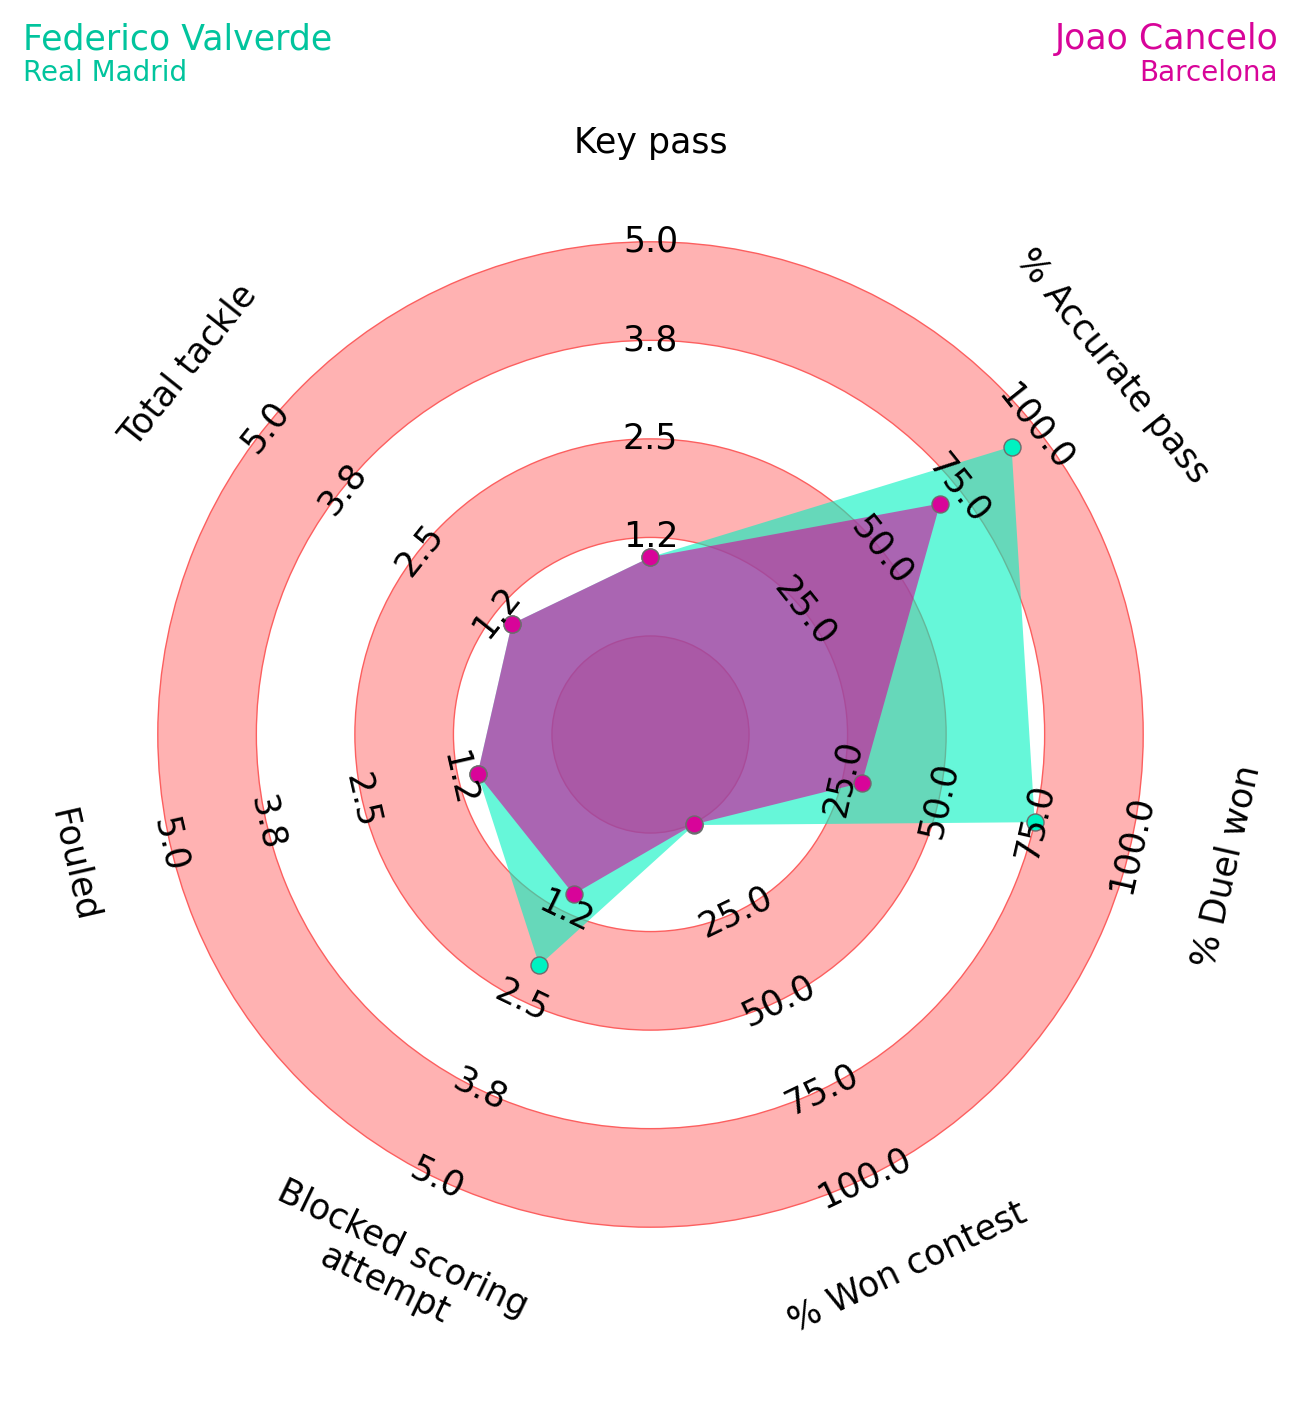

In [28]:
plot_radar(params_valverdevs_cancelo , low, high, valverde_values, cancelo_values, "Federico Valverde", "Joao Cancelo", "Real Madrid", "Barcelona")
